In [94]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 # it is useful so that the graph can be displayed on the jupyter notebook
%matplotlib inline

# problem statement
This data is about the amount spent on advertising through diffrent channels like TV, Radio, and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there any way to optimize that sale?

In [95]:
data = pd.read_csv("Advertising.csv") # reading the csv file

In [96]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [97]:
data.shape # finding the shape of the data ie num rows and columns

(200, 5)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [99]:
data.isnull().sum() # checking whether there is missing values in the columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Visualization

<AxesSubplot:>

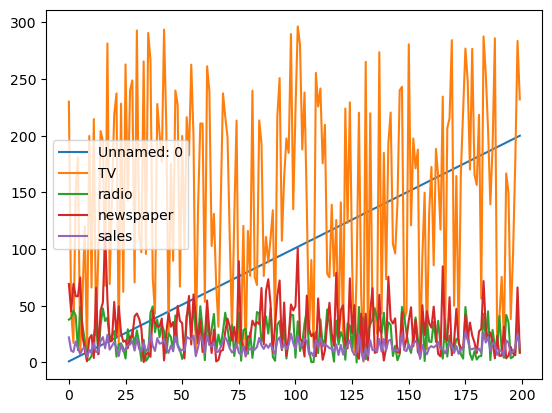

In [100]:
data.plot()

<AxesSubplot:>

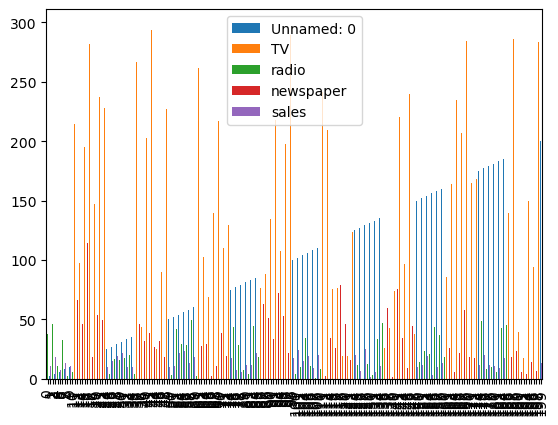

In [101]:
data.plot(kind='bar')

In [102]:
# scatter_plot

<AxesSubplot:xlabel='TV', ylabel='newspaper'>

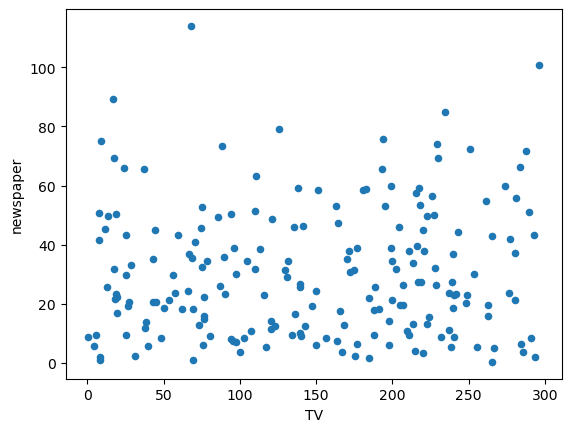

In [103]:
data.plot.scatter(x='TV', y='newspaper')

<AxesSubplot:xlabel='TV', ylabel='radio'>

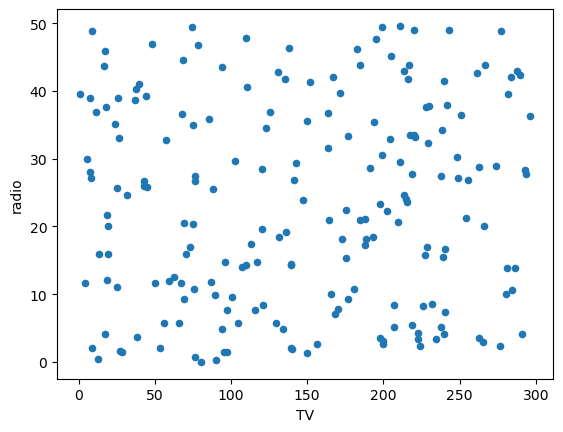

In [104]:
data.plot.scatter(x='TV', y='radio')

<AxesSubplot:xlabel='newspaper', ylabel='radio'>

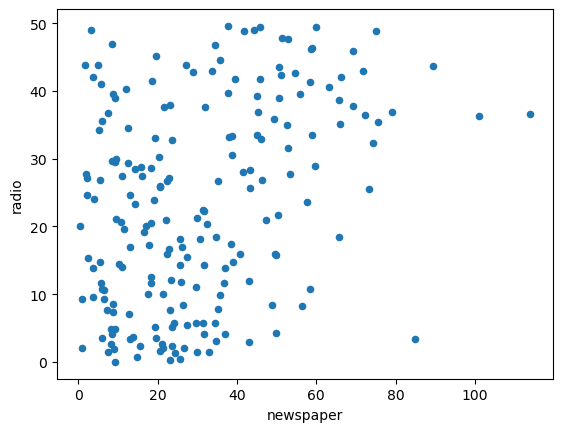

In [105]:
data.plot.scatter(x='newspaper', y='radio')

In [106]:
# using the scatter matrix
from pandas.plotting import scatter_matrix


array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='TV', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='radio', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='newspaper', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='sales', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='TV'>,
        <AxesSubplot:xlabel='TV', ylabel='TV'>,
        <AxesSubplot:xlabel='radio', ylabel='TV'>,
        <AxesSubplot:xlabel='newspaper', ylabel='TV'>,
        <AxesSubplot:xlabel='sales', ylabel='TV'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='radio'>,
        <AxesSubplot:xlabel='TV', ylabel='radio'>,
        <AxesSubplot:xlabel='radio', ylabel='radio'>,
        <AxesSubplot:xlabel='newspaper', ylabel='radio'>,
        <AxesSubplot:xlabel='sales', ylabel='radio'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='newspaper'>,
        <AxesSubplot:xlabel='TV', ylabel='newspaper'>,
        <AxesSubplot:xlabel='radio', ylab

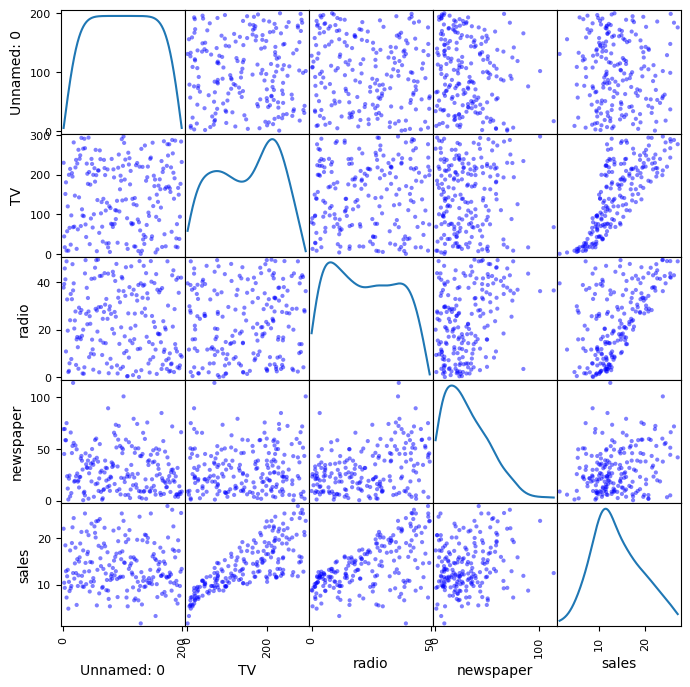

In [107]:
scatter_matrix(data, figsize=(8,8), diagonal='kde', color='b')

In [108]:
# showing the relationship between feature and the target column

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

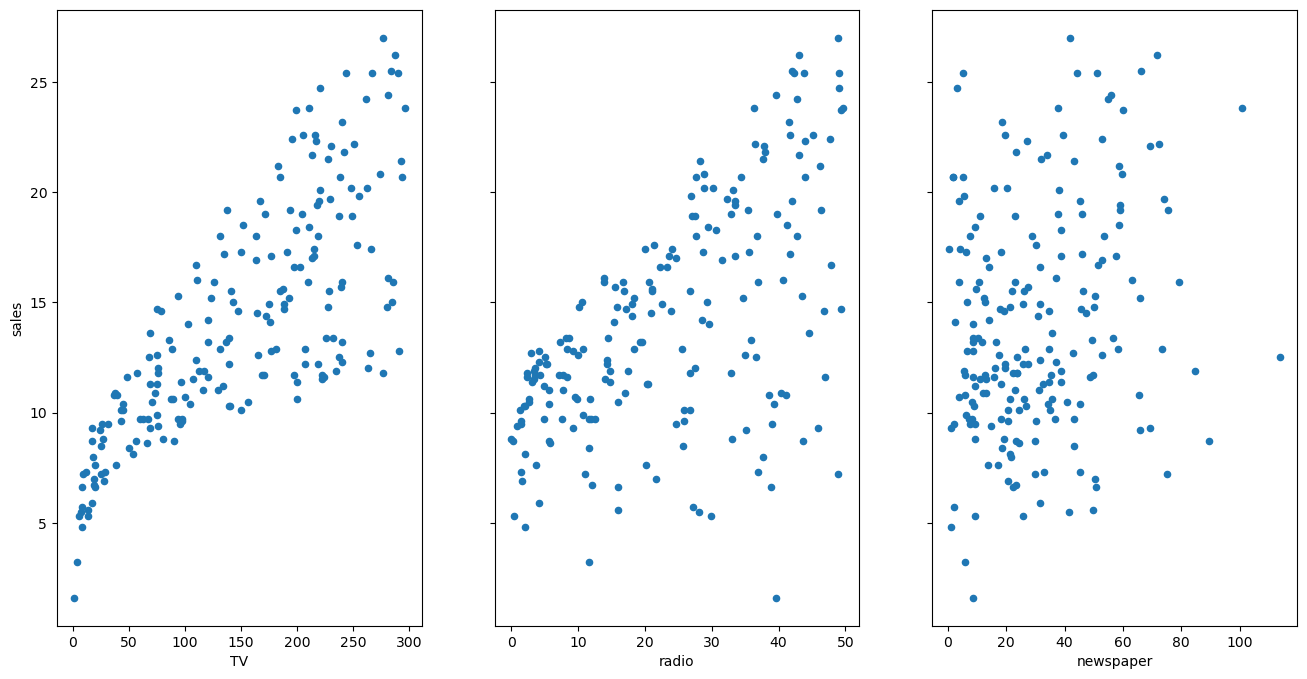

In [109]:
fig, axs = plt.subplots(1,3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [110]:
# create X and y
feature_col = ['TV', 'radio', 'newspaper']
X = data[feature_col]
y = data['sales']

In [111]:
# follow the usual sklearn pattern, import, instanciate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print the intercept and coefficient
print(lm.intercept_)
print(lm.coef_)


2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


# statistical model
they try to give a detailed idea about the performance of the model, or behaviour about your feature on top of a label

In [112]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        23:17:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# feature selection
try diffrent models and only keep th predictors n the model if they have small p-values
check if the r-squared goes up when you add new predictors to the model

In [113]:
# considering only tv
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
print(f"r_squared = {lm.rsquared}")
print("rsquared_adj = {}".format(lm.rsquared_adj))



r_squared = 0.611875050850071
rsquared_adj = 0.6099148238341623


In [114]:
# only include TV and radio in the model
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
print(f"r squared = {lm.rsquared}")
print("rsquared_adj = {}".format(lm.rsquared_adj))

r squared = 0.8971942610828957
rsquared_adj = 0.8961505479974429


In [115]:
#including all the features
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
print("r squared = {}".format(lm.rsquared))
print(f"rsquared_adj = {lm.rsquared_adj}")

r squared = 0.8972106381789522
rsquared_adj = 0.8956373316204668


# handing categorical data
introducting new column with categorical data which will contain random sample of large and small

In [116]:
import numpy as np

# seting the seed so that i will get the same state of randomness
np.random.seed(12345)

# creating a series of boolean which roughly have are true
nums = np.random.rand(len(data))
max_large = nums>0.5

# intially all the data in this series are set to small then raughly have will be set to large
data['scale'] = 'small'
data.loc[max_large, 'scale'] = 'large'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


In [117]:
#data['IsLarge'] = pd.get_dummies(data=data['scale'], drop_first=True)
data['IsLarge'] = data.scale.map({'small':0, 'large':1})

In [118]:
data

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0
196,197,94.2,4.9,8.1,9.7,small,0
197,198,177.0,9.3,6.4,12.8,small,0
198,199,283.6,42.0,66.2,25.5,small,0


In [119]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data['sales']

#instanciate, fit
lm = LinearRegression()
lm.fit(X, y)

# printing the coefficient
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i = i + 1

The Coefficient of  TV  is:  0.045719820924362775
The Coefficient of  radio  is:  0.1887281431342787
The Coefficient of  newspaper  is:  -0.0010976794483516079
The Coefficient of  IsLarge  is:  0.0574238508548277


# handling categorial variable with more than two categories

In [120]:
import numpy as np

# set the seed so as to get the same randomness everytime
np.random.seed(123456)

# generating random values
nums = np.random.rand(len(data))
mask_suburban = (nums>0.33) & (nums < 0.66)
mask_urban = nums>0.66

# initially setting all the data in this column to be rural
data['Targeted Geography'] = 'rural'

# modifying the data in the Targeted Geography to get some of it as suburban and urban
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'

In [121]:
data

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge,Targeted Geography
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,urban
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,urban
4,5,180.8,10.8,58.4,12.9,large,1,suburban
...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0,suburban
196,197,94.2,4.9,8.1,9.7,small,0,urban
197,198,177.0,9.3,6.4,12.8,small,0,suburban
198,199,283.6,42.0,66.2,25.5,small,0,rural


In [122]:
# create three dummy variables using the get_dummies then exclude the first dummy column
erea_dummies = pd.get_dummies(data=data['Targeted Geography'], prefix='Targeted Geography').iloc[:,1:]

In [123]:
erea_dummies

,Targeted Geography_suburban,Targeted Geography_urban
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
195,1,0
196,0,1
197,1,0
198,0,0


In [124]:
# concate the dummy variable columns with the original Dataframe(axis=0 means rows, axis=1 means columns)

In [125]:
data = pd.concat([data, erea_dummies], axis=1)
data

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,1,0
...,...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0,suburban,1,0
196,197,94.2,4.9,8.1,9.7,small,0,urban,0,1
197,198,177.0,9.3,6.4,12.8,small,0,suburban,1,0
198,199,283.6,42.0,66.2,25.5,small,0,rural,0,0


In [126]:
# lets include the two dummy varibles into the model
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature_cols]
y = data['sales']
X

,TV,radio,newspaper,IsLarge,Targeted Geography_suburban,Targeted Geography_urban
0,230.1,37.8,69.2,1,0,0
1,44.5,39.3,45.1,0,0,1
2,17.2,45.9,69.3,0,0,0
3,151.5,41.3,58.5,0,0,1
4,180.8,10.8,58.4,1,1,0
...,...,...,...,...,...,...
195,38.2,3.7,13.8,0,1,0
196,94.2,4.9,8.1,0,0,1
197,177.0,9.3,6.4,0,1,0
198,283.6,42.0,66.2,0,0,0


In [127]:
# initiate, fit
lm = LinearRegression()
lm.fit(X, y)

# printing the coefficient
print(feature_cols, lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]
